# **Analysis of Movies Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
movies_data = pd.read_csv('Clean_movie_data.csv')

In [3]:
movies_data.head()

,MovieTitle,ReleaseYear,RunTime,Genres,DirectorName,Rating,Studio,OriginCountry,OriginalLanguage,cast
0,1917,2019,119.0,"War, History, Thriller",Sam Mendes,4.11,DreamWorks Pictures,India,English,"George MacKay, Dean-Charles Chapman, Mark Stro..."
1,Life of Pi,2012,127.0,"Drama, Adventure",Ang Lee,3.74,Fox 2000 Pictures,India,English,"Suraj Sharma, Irrfan Khan, Ayush Tandon, Gauta..."
2,RRR,2022,185.0,"Adventure, Action, Drama",S. S. Rajamouli,4.20,DVV Entertainment,India,Telugu,"N.T. Rama Rao Jr., Ram Charan, Olivia Morris, ..."
3,Pixels,2015,106.0,"Science Fiction, Action, Fantasy, Comedy",Chris Columbus,2.33,Columbia Pictures,China,English,"Adam Sandler, Kevin James, Michelle Monaghan, ..."
4,Lincoln,2012,149.0,"History, Drama",Steven Spielberg,3.58,DreamWorks Pictures,India,English,"Daniel Day-Lewis, Sally Field, David Strathair..."


### **How Movies Runtime Change Over the Years**

In [4]:
runtime_by_year = movies_data.groupby('ReleaseYear')['RunTime'].mean().reset_index()

In [5]:
print("Average Movie Runtime by Year:")
display(runtime_by_year.head(10))  
display(runtime_by_year.tail(10))  

Average Movie Runtime by Year:


,ReleaseYear,RunTime
0,1951,133.500000
1,1955,125.000000
2,1956,110.000000
3,1957,159.000000
4,1958,100.000000
5,1959,123.500000
6,1960,162.000000
7,1963,136.000000
8,1964,117.000000
9,1965,125.333333


,ReleaseYear,RunTime
47,2016,139.423077
48,2017,134.296296
49,2018,138.777778
50,2019,141.607143
51,2020,133.466667
52,2021,139.028571
53,2022,144.020000
54,2023,145.293103
55,2024,142.682353
56,2025,148.426230


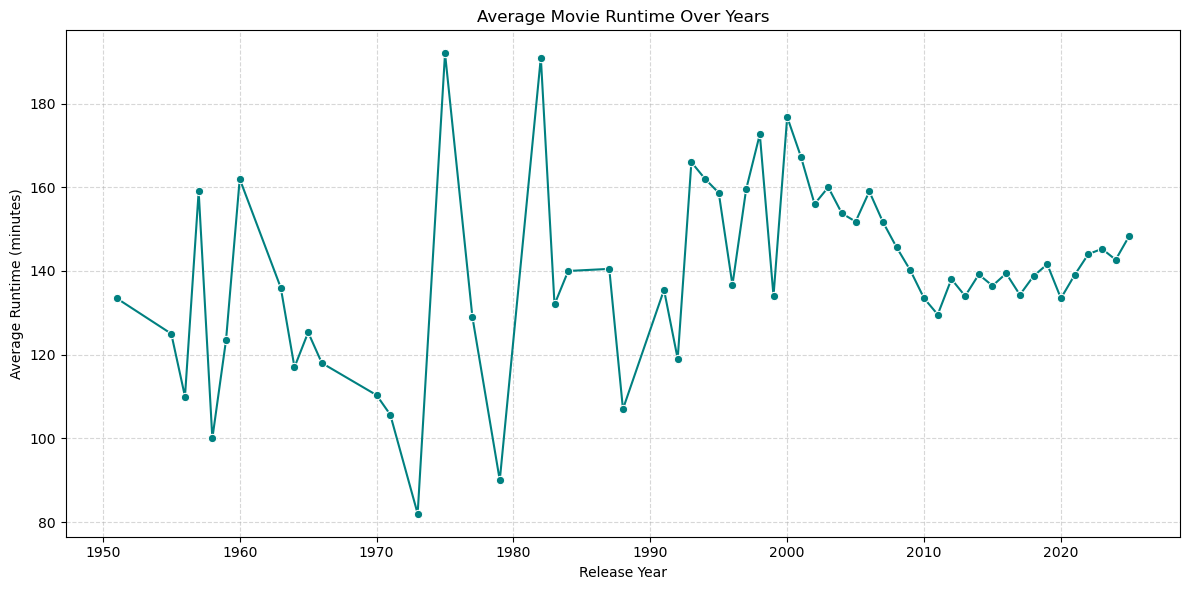

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(data=runtime_by_year, x='ReleaseYear', y='RunTime', marker='o', color='teal')
plt.title('Average Movie Runtime Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Country Wise Data Analysis**

In [7]:
country_counts = movies_data['OriginCountry'].value_counts().reset_index()
country_counts.columns = ['Country', 'MovieCount']
print("Number of Movies by Country:")
display(country_counts)

Number of Movies by Country:


,Country,MovieCount
0,India,664
1,USA,10
2,France,9
3,Canada,7
4,China,5
5,Austria,3
6,UK,2
7,Estonia,1
8,Georgia,1
9,Qatar,1


C:\Users\heise\AppData\Local\Temp\ipykernel_21492\652920443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, x='MovieCount', y='Country', palette='viridis')


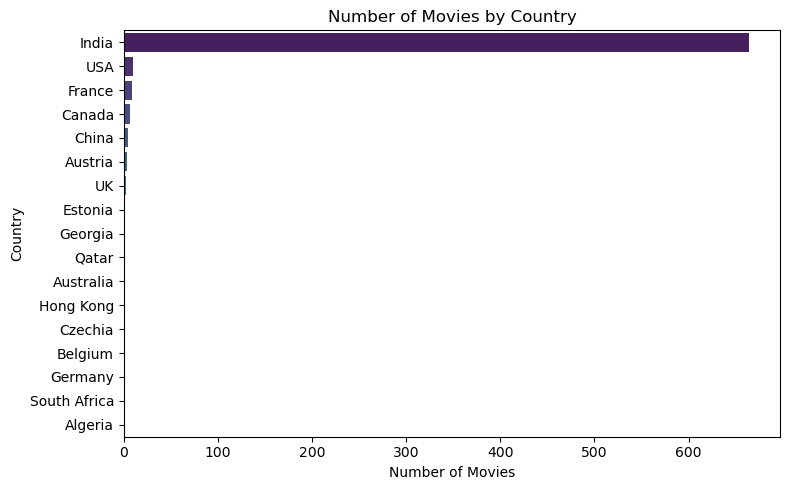

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(data=country_counts, x='MovieCount', y='Country', palette='viridis')
plt.title('Number of Movies by Country')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## **Trend of movie ratings over the years**

In [9]:
ratings_by_year = movies_data.groupby('ReleaseYear')['Rating'].mean().reset_index()
print("Average Movie Rating by Year:")
display(ratings_by_year)

Average Movie Rating by Year:


,ReleaseYear,Rating
0,1951,3.880000
1,1955,4.320000
2,1956,4.250000
3,1957,3.860000
4,1958,4.060000
5,1959,4.125000
6,1960,3.995000
7,1963,4.240000
8,1964,4.170000
9,1965,3.853333


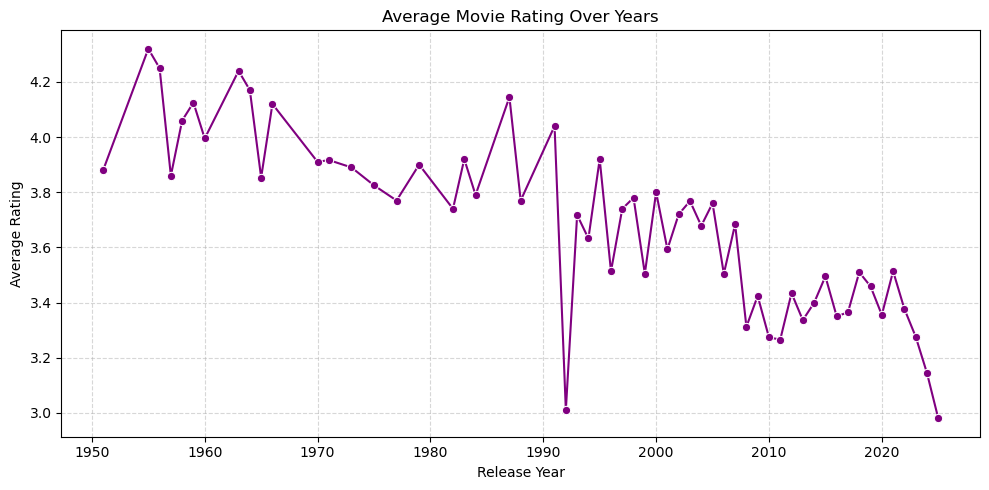

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=ratings_by_year, x='ReleaseYear', y='Rating', marker='o', color='purple')
plt.title('Average Movie Rating Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Relationship between runtime and rating**

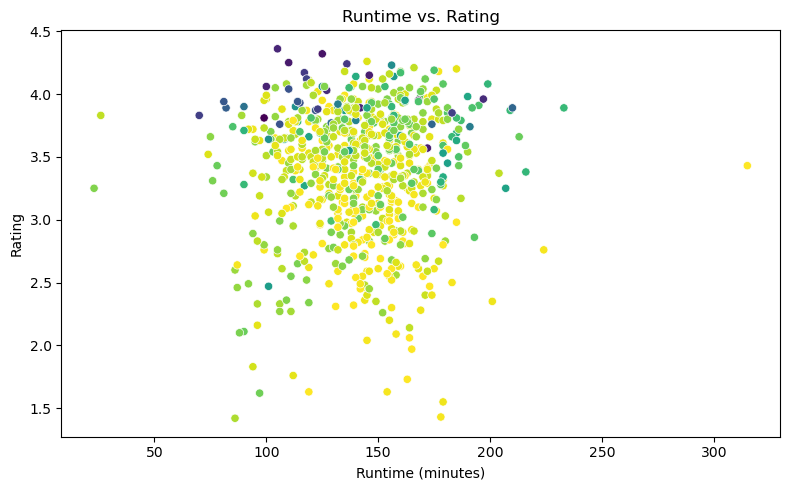

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=movies_data, x='RunTime', y='Rating', hue='ReleaseYear', palette='viridis', legend=False)
plt.title('Runtime vs. Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

### **Most popular genres**

In [12]:
genre_counts = movies_data['Genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'MovieCount']
print("Number of Movies by Genre:")
display(genre_counts)

Number of Movies by Genre:


,Genre,MovieCount
0,Drama,53
1,"Drama, Romance",36
2,"Romance, Drama",30
3,"Drama, Comedy",21
4,"Comedy, Drama",18
...,...,...
286,"Drama, Music, Romance",1
287,"Horror, Thriller, Fantasy",1
288,"Comedy, Drama, Action, Fantasy",1
289,"Comedy, Action, Fantasy",1


### **Most prolific directors**

In [13]:
director_counts = movies_data['DirectorName'].value_counts().reset_index()
director_counts.columns = ['Director', 'MovieCount']
print("Number of Movies by Director:")
display(director_counts.head(10))

Number of Movies by Director:


,Director,MovieCount
0,Mani Ratnam,15
1,Satyajit Ray,13
2,Shankar,9
3,Karthik Subbaraj,8
4,Anurag Kashyap,8
5,Karan Johar,8
6,Sanjay Leela Bhansali,8
7,Imtiaz Ali,7
8,Lijo Jose Pellissery,6
9,Vetrimaaran,6


C:\Users\heise\AppData\Local\Temp\ipykernel_21492\415351713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=director_counts.head(10), x='MovieCount', y='Director', palette='flare')


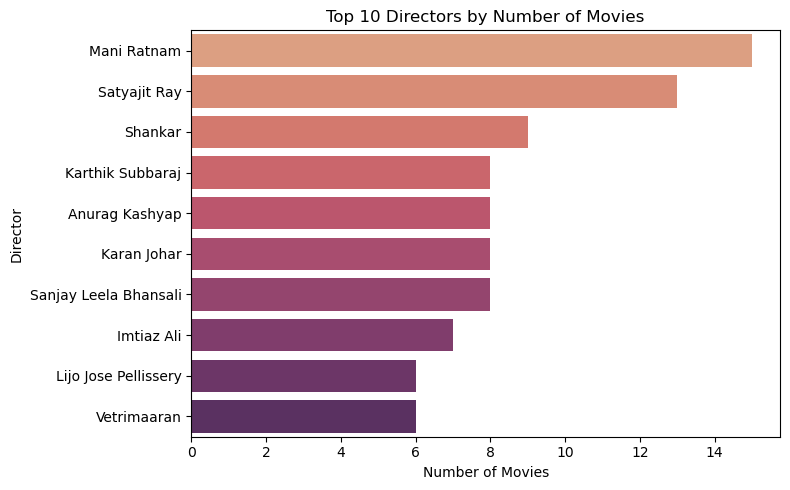

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=director_counts.head(10), x='MovieCount', y='Director', palette='flare')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

### **Studios with highest average ratings**

In [15]:
studio_ratings = movies_data.groupby('Studio')['Rating'].mean().reset_index().sort_values('Rating', ascending=False)
print("Studios with Highest Average Ratings:")
display(studio_ratings.head(10))

Studios with Highest Average Ratings:


,Studio,Rating
261,Satyajit Ray Productions,4.360
115,Government of West Bengal,4.320
309,Tribal Art Productions,4.260
88,Epic Productions,4.250
289,Sujatha Films,4.230
106,G. V. Films,4.140
156,Lakshmi Movie Makers,4.125
212,Paruchuri Vijaya Praveena Arts,4.120
231,RGK Cinema,4.090
230,R.D. Bansal & Co.,4.090


C:\Users\heise\AppData\Local\Temp\ipykernel_21492\1134369894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=studio_ratings.head(10), x='Rating', y='Studio', palette='rocket')


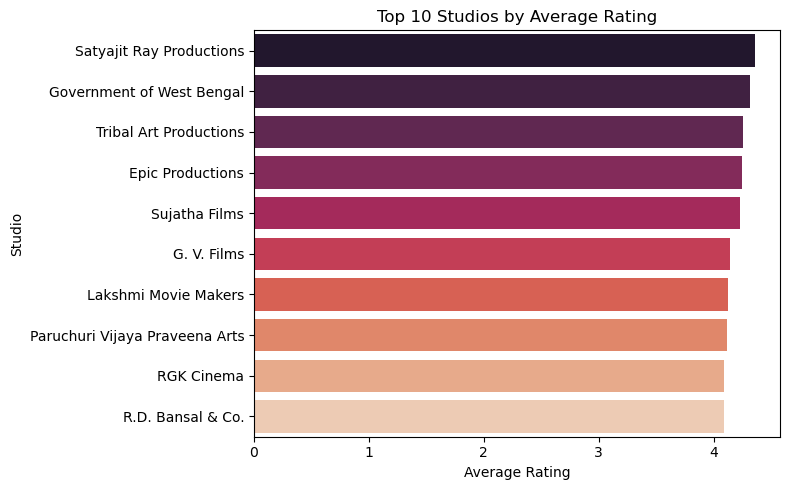

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=studio_ratings.head(10), x='Rating', y='Studio', palette='rocket')
plt.title('Top 10 Studios by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

C:\Users\heise\AppData\Local\Temp\ipykernel_21492\343345378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=studio_ratings.tail(10), x='Rating', y='Studio', palette='rocket')


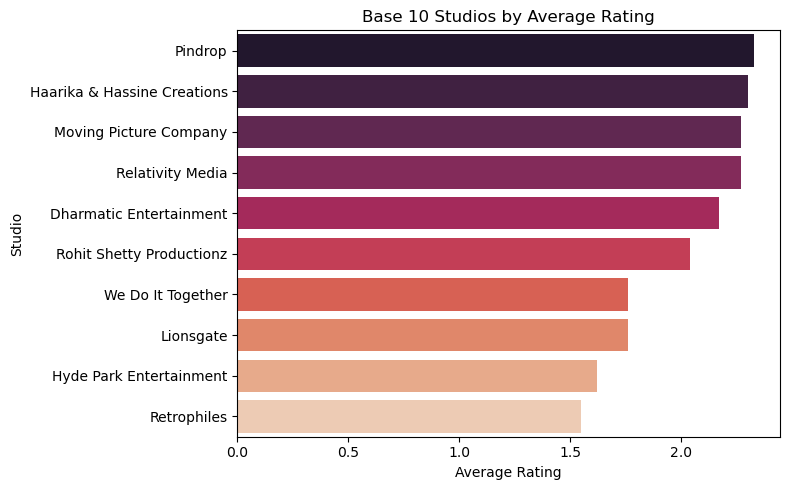

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=studio_ratings.tail(10), x='Rating', y='Studio', palette='rocket')
plt.title('Base 10 Studios by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()

### **Language Wise Analysis of Movies**

In [18]:
# Language-wise movie count
language_counts = movies_data['OriginalLanguage'].value_counts().reset_index()
language_counts.columns = ['Language', 'MovieCount']
print("Number of Movies by Language:")
display(language_counts)

Number of Movies by Language:


,Language,MovieCount
0,Hindi,318
1,Tamil,151
2,Malayalam,94
3,English,71
4,Telugu,45
5,"Bengali, Bangla",16
6,Kannada,8
7,Marathi,3
8,Gujarati,1
9,Assamese,1


C:\Users\heise\AppData\Local\Temp\ipykernel_21492\2057431533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_counts, x='MovieCount', y='Language', palette='light:#5A8')


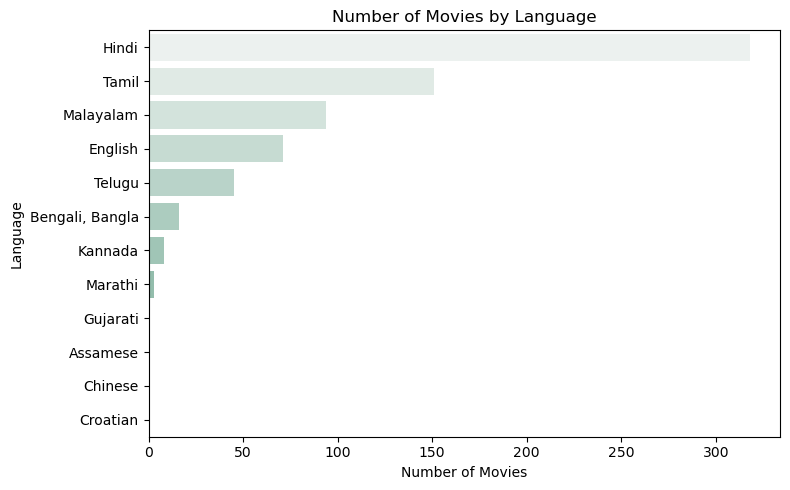

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data=language_counts, x='MovieCount', y='Language', palette='light:#5A8')
plt.title('Number of Movies by Language')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.tight_layout()
plt.show()

#### **How ratings change according to language over the years**

In [20]:
ratings_language_year = movies_data.groupby(['OriginalLanguage', 'ReleaseYear'])['Rating'].mean().reset_index()

In [22]:
fig = px.line(
    ratings_language_year,
    x='ReleaseYear',
    y='Rating',
    color='OriginalLanguage',
    markers=True,
    title='Average Movie Rating by Language Over Years',
    labels={'ReleaseYear': 'Release Year', 'Rating': 'Average Rating', 'OriginalLanguage': 'Language'}
)
fig.update_layout(legend_title_text='Language')
fig.show()